<a href="https://colab.research.google.com/github/sam19980822/3rd-ML100Days/blob/master/Day71_%E4%BD%BF%E7%94%A8%E6%90%8D%E5%A4%B1%E5%87%BD%E6%95%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [3]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

170500096/170498071 [==============================] - 14s 0us/step


In [4]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [0]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [6]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [8]:
model = Sequential()
#卷積層1與池化層1
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

#卷積層2與池化層2
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
#建立神經網路(平坦層、隱藏層、輸出層)
model.add(Flatten())
model.add(Dropout(rate=0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation='softmax'))
#檢查model 的STACK
print(model.summary())





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         


# 載入之前訓練的模型

In [9]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [0]:
#定義一個繪圖函數
import matplotlib.pyplot as plt
%matplotlib inline

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()


使用MSE，看看效果如何

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 4s 111us/step - loss: 0.0888 - acc: 0.1656 - val_loss: 0.0889 - val_acc: 0.2094
Epoch 2/12
37500/37500 [==============================] - 4s 97us/step - loss: 0.0886 - acc: 0.1705 - val_loss: 0.0888 - val_acc: 0.2122
Epoch 3/12
37500/37500 [==============================] - 4s 98us/step - loss: 0.0885 - acc: 0.1762 - val_loss: 0.0886 - val_acc: 0.2176
Epoch 4/12
37500/37500 [==============================] - 4s 98us/step - loss: 0.0883 - acc: 0.1826 - val_loss: 0.0885 - val_acc: 0.2226
Epoch 5/12
37500/37500 [==============================] - 4s 97us/step - loss: 0.0881 - acc: 0.1883 - val_loss: 0.0884 - val_acc: 0.2250
Epoch 6/12
37500/37500 [==============================] - 4s 97us/step - loss: 0.0879 - acc: 0.1918 - val_loss: 0.0882 - val_acc: 0.2306
Epoch 7/12
37500/37500 [==============================] - 4s 99us/step - loss: 0.0877 - acc: 0.1946 - val_loss: 0.0881 - val_ac

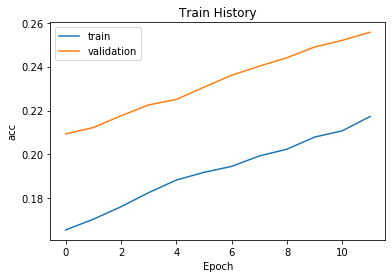

In [18]:
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])

train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)  

show_train_history(train_history,'acc','val_acc')

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 4s 118us/step - loss: 0.2749 - acc: 0.9018 - val_loss: 0.2805 - val_acc: 0.9004
Epoch 2/12
37500/37500 [==============================] - 4s 102us/step - loss: 0.2733 - acc: 0.9022 - val_loss: 0.2792 - val_acc: 0.9004
Epoch 3/12
37500/37500 [==============================] - 4s 103us/step - loss: 0.2714 - acc: 0.9024 - val_loss: 0.2777 - val_acc: 0.9004
Epoch 4/12
37500/37500 [==============================] - 4s 103us/step - loss: 0.2698 - acc: 0.9028 - val_loss: 0.2761 - val_acc: 0.9005
Epoch 5/12
37500/37500 [==============================] - 4s 102us/step - loss: 0.2681 - acc: 0.9031 - val_loss: 0.2747 - val_acc: 0.9005
Epoch 6/12
37500/37500 [==============================] - 4s 102us/step - loss: 0.2660 - acc: 0.9032 - val_loss: 0.2733 - val_acc: 0.9005
Epoch 7/12
37500/37500 [==============================] - 4s 102us/step - loss: 0.2641 - acc: 0.9034 - val_loss: 0.2715 - 

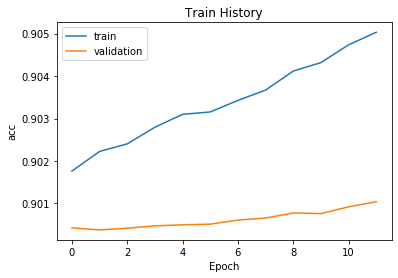

In [22]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)  

show_train_history(train_history,'acc','val_acc')

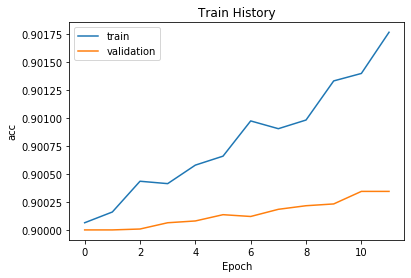